## Creating CNN Using Scratch And Transfer Learning

In [98]:
# importing the libraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [99]:
# resizing images
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [100]:
# Import the Vgg 19 library as shown below and adding preprocessing layer to the front of VGG
# Using imagenet weights

VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [101]:
# Not training existing weights
for layer in VGG19.layers:
    layer.trainable = False

In [102]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [103]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [104]:
# layers
x = Flatten()(VGG19.output)

In [107]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating model object
model = Model(inputs=VGG19.input, outputs=prediction)

In [108]:
# structure of the model
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:
### Creating Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [14]:
# telling the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [17]:
training_set

In [18]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [20]:
# fitting the model
# Running the cell
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 37s 3s/step - loss: 1.3985 - accuracy: 0.5240 - val_loss: 0.6251 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 19s 1s/step - loss: 0.6709 - accuracy: 0.5649 - val_loss: 0.6525 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 18s 1s/step - loss: 0.6067 - accuracy: 0.6611 - val_loss: 0.7849 - val_accuracy: 0.4104
Epoch 4/50
13/13 [==============================] - 20s 2s/step - loss: 0.4972 - accuracy: 0.7644 - val_loss: 1.0613 - val_accuracy: 0.3582
Epoch 5/50
13/13 [==============================] - 18s 1s/step - loss: 0.5445 - accuracy: 0.6803 - val_loss: 0.6420 - val_accuracy: 0.6343
Epoch 6/50
13/13 [==============================] - 20s 2s/step - loss: 0.4443 - accuracy: 0.8125 - val_loss: 0.6617 - val_accuracy: 0.5522
Epoch 7/50
13/13 [==============================] - 21s 2s/step - loss: 0.3561 - acc

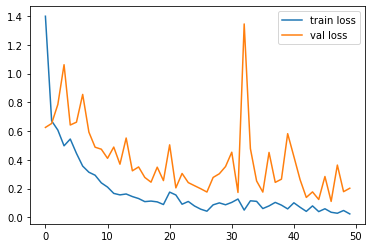

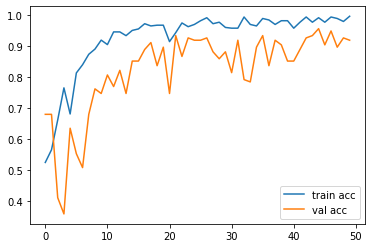

<Figure size 432x288 with 0 Axes>

In [21]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# saving it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [23]:

y_pred = model.predict(test_set)


In [24]:
y_pred

array([[9.99999881e-01, 8.82650255e-08],
       [1.00000000e+00, 5.80052060e-08],
       [1.00000000e+00, 7.82606691e-09],
       [1.00000000e+00, 2.77406228e-31],
       [1.00000000e+00, 1.46196117e-17],
       [9.99996305e-01, 3.63888535e-06],
       [1.00000000e+00, 9.67396163e-11],
       [1.00000000e+00, 6.01356670e-22],
       [1.19599560e-03, 9.98803973e-01],
       [9.99999642e-01, 3.06737718e-07],
       [9.87020373e-01, 1.29796807e-02],
       [9.99974251e-01, 2.57213869e-05],
       [7.91466057e-01, 2.08533973e-01],
       [3.02647939e-03, 9.96973515e-01],
       [9.04324472e-01, 9.56754684e-02],
       [1.00000000e+00, 8.65311225e-11],
       [1.02287449e-01, 8.97712469e-01],
       [3.26837972e-03, 9.96731639e-01],
       [8.86334538e-01, 1.13665409e-01],
       [1.00000000e+00, 5.05926824e-18],
       [9.99988317e-01, 1.16409083e-05],
       [9.99998450e-01, 1.57914496e-06],
       [9.96083140e-01, 3.91684705e-03],
       [5.62787894e-03, 9.94372129e-01],
       [5.049123

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model_vgg19.h5')

In [90]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [91]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [92]:
x.shape

(224, 224, 3)

In [93]:
x=x/255

In [94]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [95]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [96]:
a=np.argmax(model.predict(img_data), axis=1)

In [97]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
